In this notebook, we model the chromatic beam using a combination of angular beam measurements and time domain simulations

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import copy,csv
import scipy.signal as signal
import scipy.interpolate as interp
import scipy.optimize as op
import cosmology as cosmo

In [7]:
planeWaveFeedAndDish=np.loadtxt('../data/feedSim_500ns_pW.txt',skiprows=2)
voltageResponseFeedAndDish=np.loadtxt('../data/feedSim_500ns_o1.txt',skiprows=2)

planeWaveFeedAndDishNS=np.loadtxt('../data/feedSim_noSkirt_1000ns_pw.txt',skiprows=2)
voltageResponseFeedAndDishNS=np.loadtxt('../data/feedSim_noSkirt_1000ns_o1.txt',skiprows=2)

planeWaveFeedAndDish20Deg=np.loadtxt('../data/PW20deg_pw.txt')
voltageResponseFeedAndDish20Deg=np.loadtxt('../data/PW20deg_o1.txt')


ntFeedAndDish20Deg=len(planeWaveFeedAndDish20Deg)
dtFeedAndDish20Deg=planeWaveFeedAndDish20Deg[1,0]-planeWaveFeedAndDish20Deg[0,0]
ntFeedAndDish=len(planeWaveFeedAndDish)
dtFeedAndDish=voltageResponseFeedAndDish[1,0]-voltageResponseFeedAndDish[0,0]
dtFeedAndDishNS=voltageResponseFeedAndDishNS[1,0]-voltageResponseFeedAndDishNS[0,0]
ntFeedAndDishNS=len(planeWaveFeedAndDishNS)

In [8]:
#delay trace of zenith pointing
pwPadFeedAndDish=np.pad(planeWaveFeedAndDish[:,1],(ntFeedAndDish*.5,ntFeedAndDish*.5),mode='constant')
vrPadFeedAndDish=np.pad(voltageResponseFeedAndDish[:,1],(ntFeedAndDish*.5,ntFeedAndDish*.5),mode='constant')
                        
fAxisPadFeedAndDish=(fft.fftfreq(len(vrPadFeedAndDish),dtFeedAndDish))
fWaveFeedAndDish=fft.fft(fft.fftshift(pwPadFeedAndDish))
fResponseFeedAndDish=fft.fft(fft.fftshift(vrPadFeedAndDish))
dfFeedAndDish=fAxisPadFeedAndDish[1]-fAxisPadFeedAndDish[0]

selectionPos=np.logical_and(fAxisPadFeedAndDish>=50./1e3,fAxisPadFeedAndDish<=250./1e3)
selectionNeg=np.logical_and(-fAxisPadFeedAndDish>=50./1e3,-fAxisPadFeedAndDish<=250./1e3)
nSelect=len(fAxisPadFeedAndDish[selectionPos])
print nSelect
windowFeedAndDish=np.hamming(nSelect)
#windowFeedAndDish=signal.blackmanharris(nSelect)
windowFeedAndDish=windowFeedAndDish/windowFeedAndDish.mean()
windowFeedAndDishFull=np.zeros(2*ntFeedAndDish)
windowFeedAndDishFull[selectionPos]=windowFeedAndDish
windowFeedAndDishFull[selectionNeg]=windowFeedAndDish
delayResponseFeedAndDish=fft.fftshift(fft.ifft(fft.fftshift((windowFeedAndDishFull*fResponseFeedAndDish/fWaveFeedAndDish)[selectionPos])))
tAxisFeedAndDish=fft.fftshift(fft.fftfreq(len(delayResponseFeedAndDish),dfFeedAndDish))

204


In [9]:
#delay trace of sidelobe
pwPadFeedAndDish20Deg=np.pad(planeWaveFeedAndDish20Deg[:,1],(ntFeedAndDish20Deg*.5,ntFeedAndDish20Deg*.5),mode='constant')
vrPadFeedAndDish20Deg=np.pad(voltageResponseFeedAndDish20Deg[:,1],(ntFeedAndDish20Deg*.5,ntFeedAndDish20Deg*0.5),mode='constant')
                        
fAxisPadFeedAndDish20Deg=(fft.fftfreq(len(vrPadFeedAndDish20Deg),dtFeedAndDish20Deg))
fWaveFeedAndDish20Deg=fft.fft(fft.fftshift(pwPadFeedAndDish20Deg))
fResponseFeedAndDish20Deg=fft.fft(fft.fftshift(vrPadFeedAndDish20Deg))
dfFeedAndDish20Deg=fAxisPadFeedAndDish20Deg[1]-fAxisPadFeedAndDish20Deg[0]

selectionPos=np.logical_and(fAxisPadFeedAndDish20Deg>=50./1e3,fAxisPadFeedAndDish20Deg<=250./1e3)
selectionNeg=np.logical_and(-fAxisPadFeedAndDish20Deg>=50./1e3,-fAxisPadFeedAndDish20Deg<=250./1e3)
nSelect=len(fAxisPadFeedAndDish20Deg[selectionPos])
print nSelect
windowFeedAndDish20Deg=np.hamming(nSelect)
#windowFeedAndDish=signal.blackmanharris(nSelect)
windowFeedAndDish20Deg=windowFeedAndDish20Deg/windowFeedAndDish20Deg.mean()
windowFeedAndDishFull20Deg=np.zeros(ntFeedAndDish20Deg*2)
windowFeedAndDishFull20Deg[selectionPos]=windowFeedAndDish20Deg
windowFeedAndDishFull20Deg[selectionNeg]=windowFeedAndDish20Deg
delayResponseFeedAndDish20Deg=fft.fftshift(fft.ifft(fft.fftshift((windowFeedAndDishFull20Deg*fResponseFeedAndDish20Deg/fWaveFeedAndDish20Deg)[selectionPos])))
tAxisFeedAndDish20Deg=fft.fftshift(fft.fftfreq(len(delayResponseFeedAndDish20Deg),dfFeedAndDish20Deg))

215


In [74]:
def pivotFunc(x,a,b,c):
    xbelow=x<c
    xabove=x>=c
    output=np.zeros(len(x))
    output[xbelow]=a**x[xbelow]
    output[xabove]=(a**c)*b**(x[xabove])
    return output

In [98]:
def pivotFuncLog(x,a,b,c):
    xbelow=x<c
    xabove=x>=c
    output=np.zeros(len(x))
    output[xbelow]=np.log10(a)*x[xbelow]
    output[xabove]=np.log10(a)*c+np.log10(b)*(x[xabove])
    return output

[  0.89746373   0.98451797  34.79089063]
[  0.94253531   0.98742654  44.80497578]


(-100, 0)

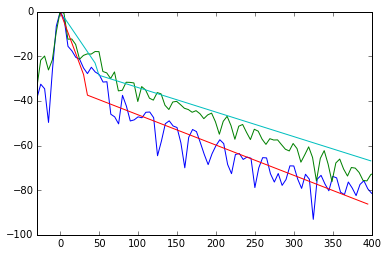

In [100]:
nVal=np.abs(delayResponseFeedAndDish).max()
nVal20=np.abs(delayResponseFeedAndDish20Deg).max()


plt.plot(tAxisFeedAndDish-35,20*np.log10(np.abs(delayResponseFeedAndDish)/nVal))
plt.plot(tAxisFeedAndDish20Deg-40,20*np.log10(np.abs(delayResponseFeedAndDish20Deg)/nVal20))

#fit to line
fitfunc = lambda x,a,b: a*x+b

selZ=np.logical_and(tAxisFeedAndDish-35.>=0.,tAxisFeedAndDish-35.<=400.)
fParams,_=op.curve_fit(pivotFuncLog,tAxisFeedAndDish[selZ]-35.,np.log10(np.abs(delayResponseFeedAndDish[selZ])/nVal),p0=[1.,1.,20.])
sel20Deg=np.logical_and(tAxisFeedAndDish20Deg-40.>=0.,tAxisFeedAndDish20Deg-40.<=400.)
fParams20Deg,_=op.curve_fit(pivotFuncLog,tAxisFeedAndDish20Deg[sel20Deg]-35.,np.log10(np.abs(delayResponseFeedAndDish[sel20Deg])/nVal20),p0=[1.,1.,10.])



print fParams
print fParams20Deg

plt.plot((tAxisFeedAndDish[selZ]-35.),20*np.log10(np.abs(pivotFunc(tAxisFeedAndDish[selZ]-35.,fParams[0],fParams[1],fParams[2]))))
plt.plot((tAxisFeedAndDish20Deg[sel20Deg]-40.),20*np.log10(np.abs(pivotFunc(tAxisFeedAndDish20Deg[sel20Deg]-40.,fParams20Deg[0],fParams20Deg[1],fParams20Deg[2]))))


plt.xlim(-30,400)
plt.ylim(-100,0)